In [1]:
# importing the dependncies
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#import the data
data = keras.datasets.mnist

In [7]:
#load the data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

In [ ]:
#verify the data

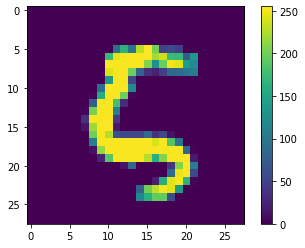

In [9]:
plt.figure()
plt.imshow(train_images[2000])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

In [11]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

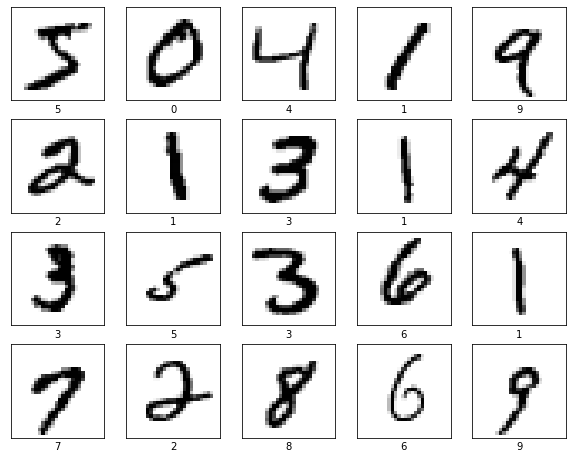

In [14]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
#building the model

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy']
             )

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 624us/step - loss: 0.2672 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 1s 619us/step - loss: 0.1169 - accuracy: 0.9654
Epoch 3/10
1875/1875 [==============================] - 1s 625us/step - loss: 0.0810 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 1s 637us/step - loss: 0.0588 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 1s 631us/step - loss: 0.0466 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 1s 622us/step - loss: 0.0354 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 1s 638us/step - loss: 0.0288 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.0241 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 1s 637us/step - loss: 0.0191 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 1s 638u

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.0805 - accuracy: 0.9778


In [22]:
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [23]:
pred = prob_model.predict(test_images)

In [29]:
pred[1000]

array([5.1776430e-12, 1.0276838e-08, 3.4899794e-14, 7.3005729e-05,
       5.0055492e-06, 9.4838182e-10, 2.6045633e-17, 8.0048092e-05,
       3.2601685e-10, 9.9984193e-01], dtype=float32)

In [30]:
np.argmax(pred[1000])

9

In [31]:
test_labels[1000]

9

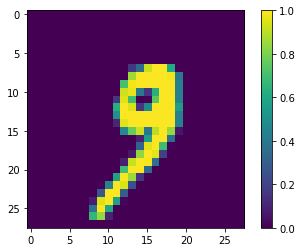

In [32]:
plt.figure()
plt.imshow(test_images[1000])
plt.colorbar()
plt.grid(False)
plt.show()